#**PROBLEMA DE NEGOCIO**


---




##Una tienda online de moda, con presencia en todo Brasil, necesita impulsar su rendimiento utilizando sus datos de manera estratégica. Como científico de datos, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es el Top 5 productos más vendidos históricamente?

2. ¿Cual es la evolución histórica de las ingresos netos?

3. ¿Cuáles son los ingresos netos por vendedor por año?

4. ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?

5. ¿Existe otro insight que puedas proporcionar?

#**1. Configuración del Ambiente**


---




In [ ]:
!pip install geobr
!pip install Pillow
import geobr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import requests
from io import BytesIO
from sqlalchemy import create_engine, MetaData, Table, inspect, text
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from sqlalchemy import create_engine
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import LinearSegmentedColormap
import requests
import sqlite3
from io import BytesIO
from urllib.request import urlretrieve
from PIL import Image  # Importamos PIL para trabajar con imágenes
import os  # Importamos os para trabajar con rutas de archivos y directorios

global df_itens_pedidos, df_pedidos, df_productos, df_vendedores, database

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.3
    Uninstalling shapely-2.0.3:
      Successfully uninstalled shapely-2.0.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [ ]:
!pip install geobr
!pip install Pillow
import geobr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import requests
from io import BytesIO
from sqlalchemy import create_engine, MetaData, Table, inspect, text
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from sqlalchemy import create_engine
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from sqlalchemy import create_engine
from matplotlib.patches import FancyBboxPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import LinearSegmentedColormap
import requests
from io import BytesIO
from PIL import Image
from urllib.request import urlretrieve
import os  # Importamos os para trabajar con rutas de archivos y directorios



global df_itens_pedidos, df_pedidos, df_productos, df_vendedores, database

#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [ ]:
df_itens_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/itens_pedidos.csv')
df_itens_pedidos.head()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [ ]:
df_pedidos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/pedidos.csv')
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [ ]:
df_productos = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/productos.csv')
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248.0,Usado


In [ ]:
df_vendedores = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/vendedores.csv')
df_vendedores.head()

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


##**2.2 Tratamiento de Datos**

In [ ]:
print(df_itens_pedidos.info())
print('-------------')
print(df_pedidos.info())
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pedido_id     24527 non-null  int64 
 1   producto_id   24527 non-null  int64 
 2   vendedor_id   24527 non-null  int64 
 3   fecha_compra  24527 non-null  object
 

In [ ]:
#@title
def preprocesamiento():
  global df_itens_pedidos, df_pedidos, df_productos, df_vendedores
  df_itens_pedidos=pd.DataFrame(df_itens_pedidos)
  df_pedidos=pd.DataFrame(df_pedidos)
  df_productos=pd.DataFrame(df_productos)
  df_vendedores=pd.DataFrame(df_vendedores)





In [ ]:
df_itens_pedidos

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,ciudad,costo_envio
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [ ]:
# Mostrar la cantidad de valores nulos en las columnas 'id_recibo' , 'producto_id y 'pedido_id'
print("Cantidad de valores nulos en las columnas 'id_recibo' ,'producto_id' y 'pedido_id' :")
print(df_itens_pedidos[['id_recibo', 'producto_id', 'pedido_id']].isnull().sum())

# Eliminar registros con valores nulos en las columnas 'Columna1' y 'Columna2'
df_sin_nulos = df_itens_pedidos.dropna(subset=['id_recibo', 'producto_id','pedido_id'])

# Mostrar la cantidad de valores nulos después de eliminarlos
print("\nCantidad de valores nulos en las columnas 'Columna1' y 'Columna2' después de eliminarlos:")
print(df_sin_nulos[['id_recibo', 'producto_id','pedido_id']].isnull().sum())

Cantidad de valores nulos en las columnas 'id_recibo' ,'producto_id' y 'pedido_id' :
id_recibo      0
producto_id    0
pedido_id      0
dtype: int64

Cantidad de valores nulos en las columnas 'Columna1' y 'Columna2' después de eliminarlos:
id_recibo      0
producto_id    0
pedido_id      0
dtype: int64


In [ ]:
df_pedidos.head()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
0,341,41518,6,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [ ]:
# Mostrar la cantidad de valores nulos en las columnas 'pedido_id' , 'producto_id y 'vendedor_id'
print("Cantidad de valores nulos en las columnas 'pedido_id' ,'producto_id' y 'vendedor_id' :")
print(df_pedidos[['pedido_id', 'producto_id', 'vendedor_id']].isnull().sum())

# Eliminar registros con valores nulos en las columnas 'pedido_id' , 'producto_id' y 'vendedor_id'
df_sin_nulos = df_pedidos.dropna(subset=['pedido_id', 'producto_id','vendedor_id'])

# Mostrar la cantidad de valores nulos después de eliminarlos
print("\nCantidad de valores nulos en las columnas 'pedido_id' , 'producto_id' y 'vendedor_id' después de eliminarlos:")
print(df_sin_nulos[['pedido_id', 'producto_id','vendedor_id']].isnull().sum())

Cantidad de valores nulos en las columnas 'pedido_id' ,'producto_id' y 'vendedor_id' :
pedido_id      0
producto_id    0
vendedor_id    0
dtype: int64

Cantidad de valores nulos en las columnas 'pedido_id' , 'producto_id' y 'vendedor_id' después de eliminarlos:
pedido_id      0
producto_id    0
vendedor_id    0
dtype: int64


In [ ]:
df_productos.head()

,producto_id,producto,precio,marca,sku,condicion
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297.0,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612.0,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482.0,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658.0,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248.0,Usado


In [ ]:
# Mostrar la cantidad de valores nulos en las columnas 'producto_id	'
print("Cantidad de valores nulos en las columnas 'producto_id'  :")
print(df_productos[['producto_id']].isnull().sum())

# Eliminar registros con valores nulos en las columnas 'producto_id'
df_sin_nulos = df_productos.dropna(subset=['producto_id'])

# Mostrar la cantidad de valores nulos después de eliminarlos
print("\nCantidad de valores nulos en las columnas 'producto_id'  después de eliminarlos:")
print(df_sin_nulos[['producto_id']].isnull().sum())

Cantidad de valores nulos en las columnas 'producto_id'  :
producto_id    0
dtype: int64

Cantidad de valores nulos en las columnas 'producto_id'  después de eliminarlos:
producto_id    0
dtype: int64


In [ ]:
df_vendedores.head()

,vendedor_id,nombre_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [ ]:
# Mostrar la cantidad de valores nulos en las columnas 'vendedor_id	'
print("Cantidad de valores nulos en las columnas 'vendedor_id'  :")
print(df_vendedores[['vendedor_id']].isnull().sum())

# Eliminar registros con valores nulos en las columnas 'vendedor_id'
df_sin_nulos = df_vendedores.dropna(subset=['vendedor_id'])

# Mostrar la cantidad de valores nulos después de eliminarlos
print("\nCantidad de valores nulos en las columnas 'vendedor_id'  después de eliminarlos:")
print(df_sin_nulos[['vendedor_id']].isnull().sum())

Cantidad de valores nulos en las columnas 'vendedor_id'  :
vendedor_id    0
dtype: int64

Cantidad de valores nulos en las columnas 'vendedor_id'  después de eliminarlos:
vendedor_id    0
dtype: int64


In [ ]:
#df_itens_pedidos, df_pedidos, df_productos, df_vendedores
# Mostrar la cantidad de filas duplicadas en todas las columnas
print("Cantidad de filas duplicadas en todas las columnas de df_itens_pedidos:")
print(df_itens_pedidos.duplicated().sum())

# Eliminar filas duplicadas
df_sin_duplicados = df_itens_pedidos.drop_duplicates()

# Mostrar la cantidad de filas duplicadas después de eliminarlas
print("\nCantidad de filas duplicadas después de eliminarlas:")
print(df_sin_duplicados.duplicated().sum())

Cantidad de filas duplicadas en todas las columnas de df_itens_pedidos:
0

Cantidad de filas duplicadas después de eliminarlas:
0


In [ ]:
#df_itens_pedidos, df_pedidos, df_productos, df_vendedores
# Mostrar la cantidad de filas duplicadas en todas las columnas
print("Cantidad de filas duplicadas en todas las columnas de df_pedidos:")
print(df_pedidos.duplicated().sum())

# Eliminar filas duplicadas
df_sin_duplicados = df_pedidos.drop_duplicates()

# Mostrar la cantidad de filas duplicadas después de eliminarlas
print("\nCantidad de filas duplicadas después de eliminarlas:")
print(df_sin_duplicados.duplicated().sum())

# Convertir la columna 'Fecha' a tipo date
df_pedidos['fecha_compra'] = pd.to_datetime(df_pedidos['fecha_compra'])


Cantidad de filas duplicadas en todas las columnas de df_pedidos:
0

Cantidad de filas duplicadas después de eliminarlas:
0


In [ ]:
#df_itens_pedidos, df_pedidos, df_productos, df_vendedores
# Mostrar la cantidad de filas duplicadas en todas las columnas
print("Cantidad de filas duplicadas en todas las columnas de df_productos:")
print(df_productos.duplicated().sum())

# Eliminar filas duplicadas
df_sin_duplicados = df_productos.drop_duplicates()

# Mostrar la cantidad de filas duplicadas después de eliminarlas
print("\nCantidad de filas duplicadas después de eliminarlas:")
print(df_sin_duplicados.duplicated().sum())

Cantidad de filas duplicadas en todas las columnas de df_productos:
0

Cantidad de filas duplicadas después de eliminarlas:
0


In [ ]:
#df_itens_pedidos, df_pedidos, df_productos, df_vendedores
# Mostrar la cantidad de filas duplicadas en todas las columnas
print("Cantidad de filas duplicadas en todas las columnas de df_vendedores:")
print(df_vendedores.duplicated().sum())

# Eliminar filas duplicadas
df_sin_duplicados = df_vendedores.drop_duplicates()

# Mostrar la cantidad de filas duplicadas después de eliminarlas
print("\nCantidad de filas duplicadas después de eliminarlas:")
print(df_sin_duplicados.duplicated().sum())

Cantidad de filas duplicadas en todas las columnas de df_vendedores:
0

Cantidad de filas duplicadas después de eliminarlas:
0


In [ ]:
preprocesamiento()
print(df_itens_pedidos.info())
print('-------------')
print(df_pedidos.info())
print('-------------')
print(df_productos.info())
print('-------------')
print(df_vendedores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_recibo       24527 non-null  int64  
 1   producto_id     24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   cantidad        24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   ciudad          24527 non-null  object 
 7   costo_envio     24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pedido_id     24527 non-null  int64         
 1   producto_id   24527 non-null  int64         
 2   vendedor_id   24527 non-null  int64         
 3 

##**2.3 Análisis Exploratorio (EDA)**

In [ ]:
df_pedidos.describe()

,pedido_id,producto_id,vendedor_id,fecha_compra,total
count,24527.000000,24527.000000,24527.000000,24527,24527.000000
mean,69931.383088,44627.641171,2.975782,2020-04-02 12:10:46.406001664,1867.490113
min,1.000000,2706.000000,1.000000,2019-01-05 00:00:00,45.000000
25%,34487.000000,17258.000000,2.000000,2019-11-12 00:00:00,520.000000
50%,69945.000000,42913.000000,3.000000,2020-04-09 00:00:00,1050.000000
75%,105355.000000,70673.000000,4.000000,2020-09-21 00:00:00,1920.000000
max,139993.000000,100983.000000,6.000000,2021-03-10 00:00:00,39000.000000
std,40560.769565,29347.824879,1.442412,NaN,3379.681887


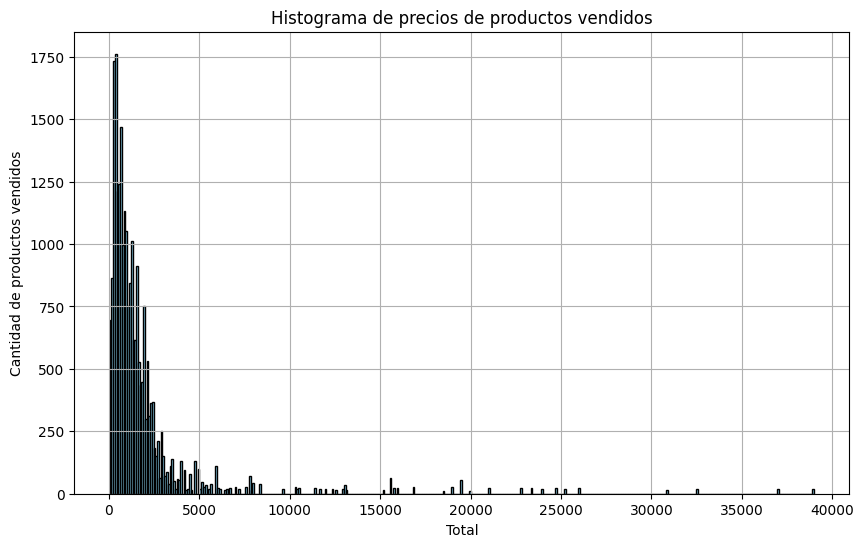

In [ ]:
#df_itens_pedidos, df_pedidos, df_productos, df_vendedores
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_itens_pedidos['valor_total'], bins=400, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Total')
plt.ylabel('Cantidad de productos vendidos')
plt.title('Histograma de precios de productos vendidos')

# Mostrar el histograma
plt.grid(True)
plt.show()

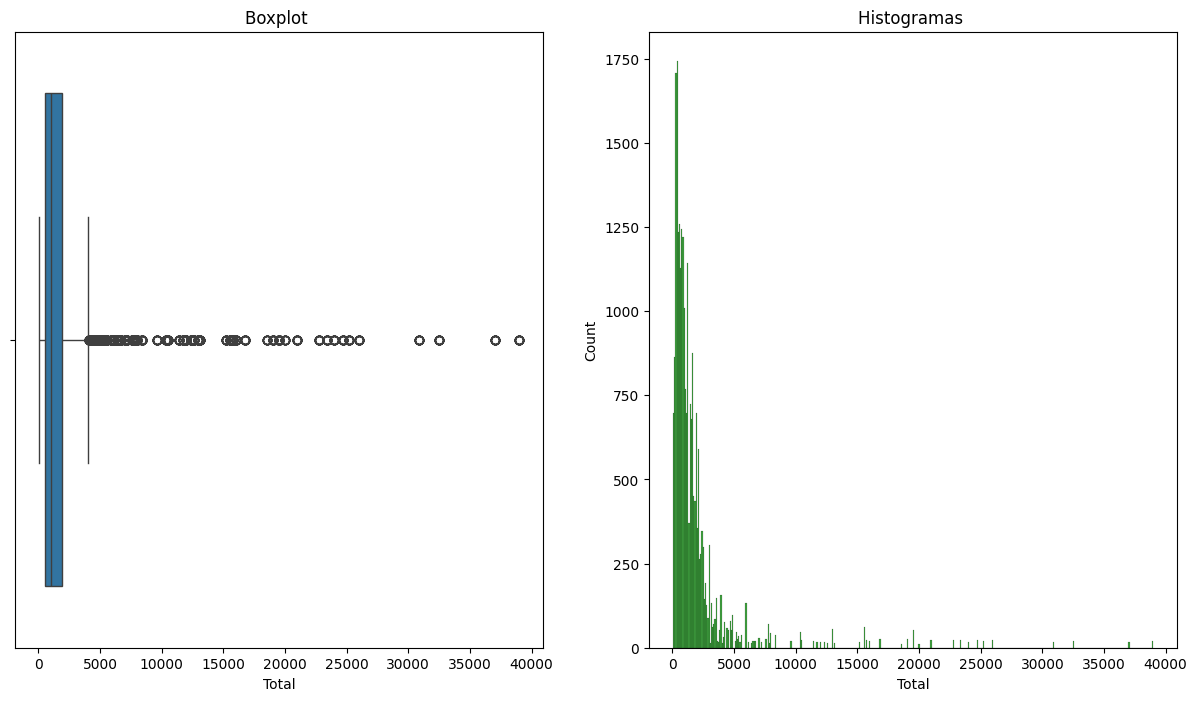

In [ ]:
fig, axes = plt.subplots( ncols=2, figsize=(15, 8),)

sns.histplot(df_itens_pedidos,x="valor_total", color='green',ax=axes[1])
sns.boxplot(df_itens_pedidos,x="valor_total",ax=axes[0])

axes[0].set_title('Boxplot ')
axes[1].set_title('Histogramas ')
axes[0].set_xlabel("Total")
axes[1].set_xlabel("Total")
plt.show()

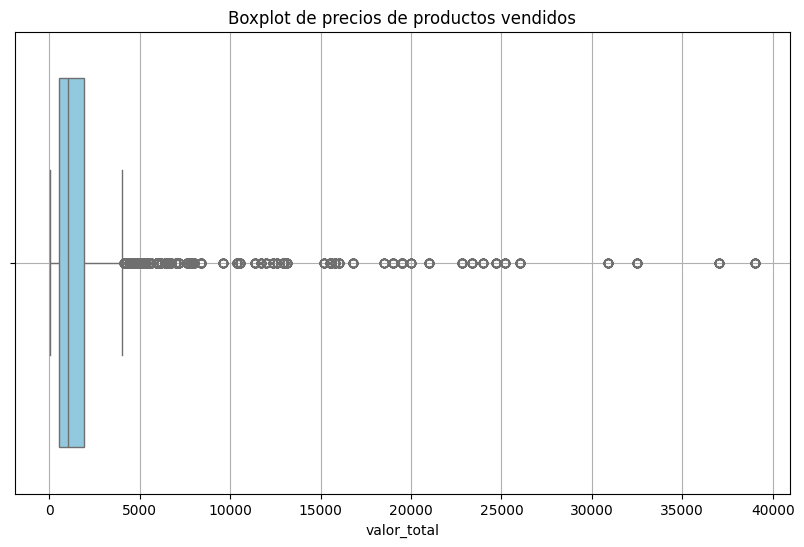

In [ ]:
import seaborn as sns

# Suponiendo que ya tienes cargado el DataFrame df_itens_pedidos

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_itens_pedidos['valor_total'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('valor_total')
plt.title('Boxplot de precios de productos vendidos')

# Mostrar el boxplot
plt.grid(True)
plt.show()

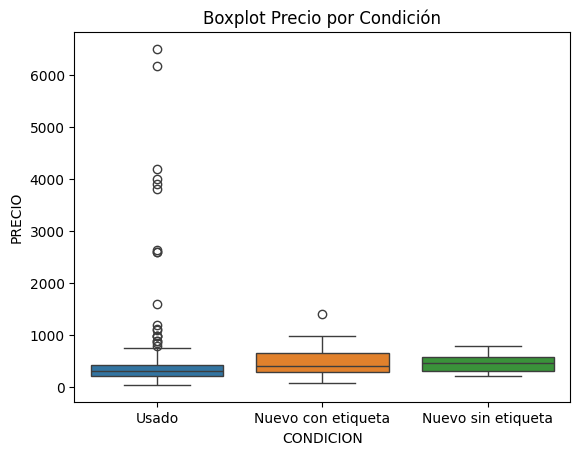

In [ ]:
ax=sns.boxplot(df_productos,x="condicion",y="precio",hue="condicion")
ax.set(xlabel='CONDICION', ylabel='PRECIO')
ax.set_title("Boxplot Precio por Condición")
plt.show()

In [ ]:
df_productos.describe()

,producto_id,precio,sku
count,207.000000,207.000000,205.000000
mean,44730.502415,533.101449,304625.234146
std,29288.923989,840.190619,190141.444036
min,2706.000000,45.000000,101494.000000
25%,17362.000000,210.000000,222028.000000
50%,42913.000000,320.000000,263899.000000
75%,70456.500000,450.000000,304828.000000
max,100983.000000,6500.000000,952821.000000


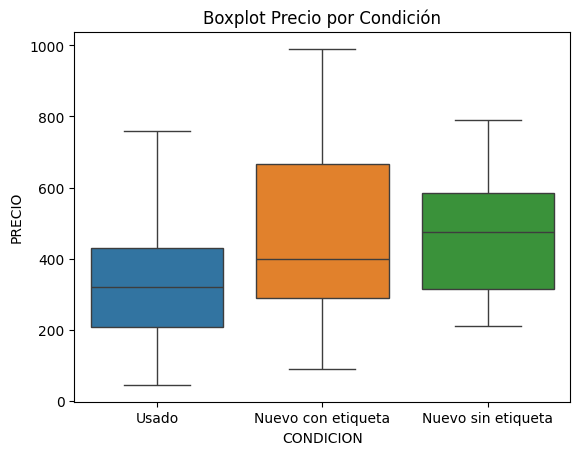

In [ ]:
ax=sns.boxplot(df_productos,x="condicion",y="precio",hue="condicion",showfliers=False)
ax.set(xlabel='CONDICION', ylabel='PRECIO')
ax.set_title("Boxplot Precio por Condición")
plt.show()

In [ ]:
df_itens_pedidos.describe()

,id_recibo,producto_id,pedido_id,cantidad,valor_unitario,valor_total,costo_envio
count,24527.000000,24527.000000,24527.000000,24527.000000,24527.00000,24527.000000,24527.000000
mean,12405.414278,44627.641171,69931.383088,3.497126,535.68867,1867.490113,373.498023
std,7242.697484,29347.824879,40560.769565,1.706170,839.21405,3379.681887,675.936377
min,1.000000,2706.000000,1.000000,1.000000,45.00000,45.000000,9.000000
25%,6132.500000,17258.000000,34487.000000,2.000000,210.00000,520.000000,104.000000
50%,12264.000000,42913.000000,69945.000000,4.000000,336.00000,1050.000000,210.000000
75%,18689.500000,70673.000000,105355.000000,5.000000,450.00000,1920.000000,384.000000
max,25055.000000,100983.000000,139993.000000,6.000000,6500.00000,39000.000000,7800.000000


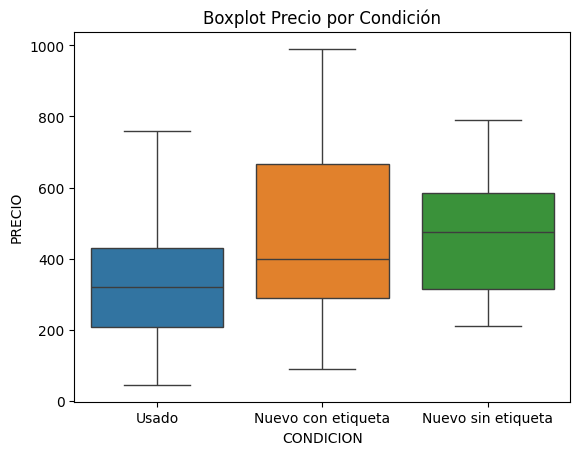

In [ ]:
ax=sns.boxplot(df_productos,x="condicion",y="precio",hue="condicion",showfliers=False)
ax.set(xlabel='CONDICION', ylabel='PRECIO')
ax.set_title("Boxplot Precio por Condición")
plt.show()

#**3. Preguntas y respuestas**


---




##**3.1 Creando el banco de datos**

In [ ]:
#@title
def crear_conexion():
  global df_itens_pedidos, df_pedidos, df_productos, df_vendedores, database, engine
  # Definir el nombre del archivo de la base de datos SQLite
  database = 'database.sqlite'
  # Crear el engine de SQLite
  engine = create_engine('sqlite:///{}'.format(database))
  # Guardar cada DataFrame en su respectiva tabla SQL en la base de datos
  df_itens_pedidos.to_sql('itens_pedidos', engine, if_exists='replace', index=False)
  df_pedidos.to_sql('pedidos', engine, if_exists='replace', index=False)
  df_productos.to_sql('productos', engine, if_exists='replace', index=False)
  df_vendedores.to_sql('vendedores', engine, if_exists='replace', index=False)


In [ ]:
crear_conexion()
inspector = inspect(engine)
print('Tablas: ', inspector.get_table_names(), '\n')
print('Columnas de Tabla Pedidos:')
for column in inspector.get_columns('pedidos'):
    print(column)


Tablas:  ['itens_pedidos', 'pedidos', 'productos', 'vendedores'] 

Columnas de Tabla Pedidos:
{'name': 'pedido_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'producto_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'vendedor_id', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'fecha_compra', 'type': DATETIME(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'total', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}


##**3.2: ¿Cual es el Top 5 productos más y menos vendidos históricamente?**

<ipython-input-34-06e03cda9fa8>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


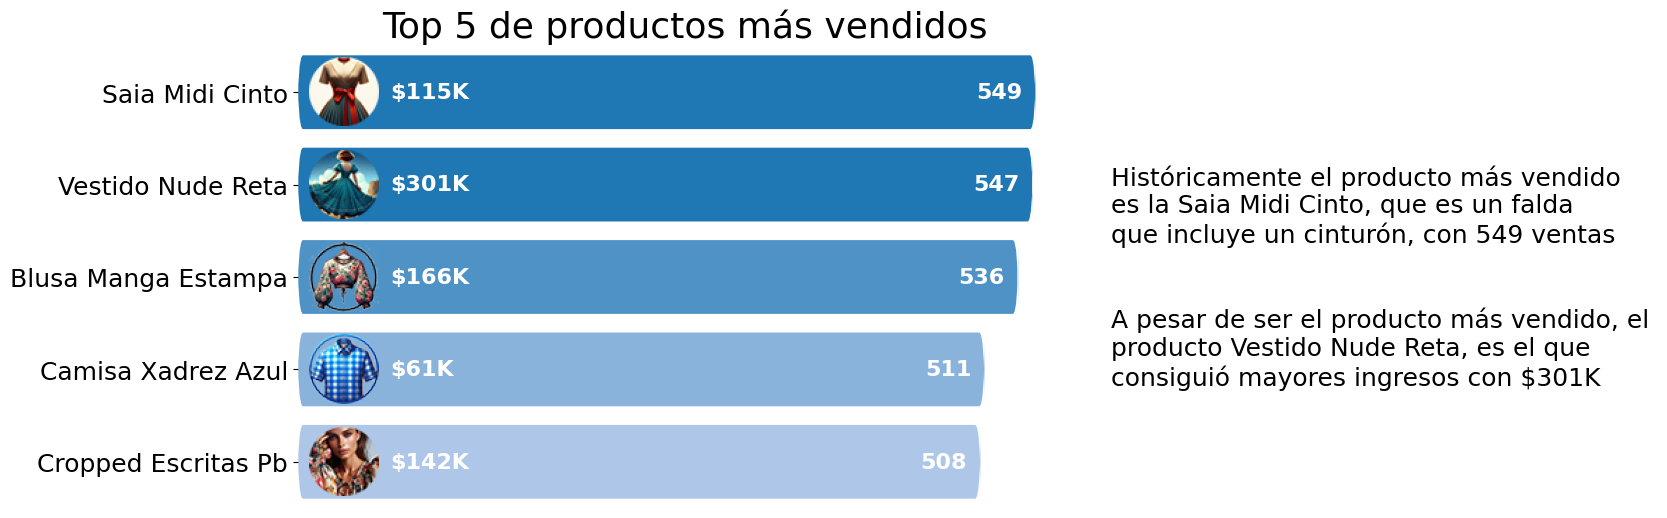

In [ ]:


# Definir el nombre del archivo de la base de datos SQLite
database = 'database.sqlite'

# Crear el engine de SQLite
engine = create_engine('sqlite:///{}'.format(database))

# Definir la consulta SQL
consulta_sql = """
SELECT p.producto_id,
       p.producto,
       p.marca,
       SUM(ip.cantidad) AS total_cantidad,
       SUM(ip.valor_total) AS total_vendido
FROM productos p
JOIN itens_pedidos ip ON p.producto_id = ip.producto_id
GROUP BY p.producto_id, p.producto, p.marca
ORDER BY total_cantidad DESC
LIMIT 5;
"""

# Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df = pd.read_sql_query(consulta_sql, engine)

# Crear el gráfico de barras horizontales con Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='total_cantidad', y='producto', data=df, orient='h')

# Quitar la cuadrícula del fondo
ax.grid(False)

# Quitar el cuadro delimitador
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Eliminar etiquetas y ticks del eje y
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both', length=0)

# Eliminar el título del eje x
ax.set_xlabel('')

# Eliminar el título del eje y
ax.set_ylabel('')

# Añadir título
plt.title('Top 5 de productos más vendidos', fontsize=26)
# Aumentar el tamaño de las etiquetas del eje y
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)



# Obtener límites del eje x y eje y
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Obtener el producto más vendido y su información
producto_mas_vendido = df.iloc[0]  # Tomamos la primera fila ya que está ordenada por cantidad vendida
producto_segundo_mas_vendido = df.iloc[1]
segunda_venta_mayor=df.iloc[1]
nombre_producto_mas_vendido = producto_mas_vendido['producto']
segundo_nombre_producto_mas_vendido= producto_segundo_mas_vendido['producto']
cantidad_vendida_mas_vendida = producto_mas_vendido['total_cantidad']
ventas_producto_mas_vendido = segunda_venta_mayor['total_vendido']


# Añadir texto adicional debajo de la línea
ax.text(x_limits[1] + (x_limits[1] - x_limits[0]) * 0.05,
         (y_limits[0] + y_limits[1]) / 2,
         'Históricamente el producto más vendido\n'
         f'es la {nombre_producto_mas_vendido}, que es un falda\n'
         f'que incluye un cinturón, con {cantidad_vendida_mas_vendida} ventas \n'
         '\n'
         '\n'
         'A pesar de ser el producto más vendido, el \n'
         f'producto {segundo_nombre_producto_mas_vendido}, es el que \n'
         f'consiguió mayores ingresos con ${ventas_producto_mas_vendido/1000:.0f}K ',
         fontsize=18,
         ha='left',  # Alinear a la izquierda horizontalmente
         va='center')  # Centrar verticalmente

# Crear colormap personalizado
colors = [ '#aec7e8','#1f77b4']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

new_patches = []
for i, patch in enumerate(reversed(ax.patches)):
    bb = patch.get_bbox()
    color = cmap(i / len(ax.patches))  # Aplicar el degradado de color
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            # Aumentar el tamaño de los bordes redondeados
                            boxstyle="round,pad=-0.0040,rounding_size=4",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

# Añadir valores de total_cantidad al final y dentro de cada barra en color blanco
for i, row in df.iterrows():
    x_pos = row['total_cantidad']-10
    y_pos = i
    ax.text(x_pos, y_pos, str(row['total_cantidad']),
            ha='right', va='center', color='white', fontsize=16, weight='bold')

# Calcular la posición x fija para todos los textos de total_vendido
x_pos = df['total_cantidad'].max() - 480

# Añadir valores de total_vendido al principio de cada barra en negrita y formato de miles con símbolo de dólar
for i, row in df.iterrows():
    y_pos = i
    total_vendido = row['total_vendido'] / 1000  # Convertir a miles
    ax.text(x_pos, y_pos, f"${total_vendido:.0f}K",  # Mostrar en miles con el símbolo de dólar
            ha='left', va='center', color='white', fontsize=16, fontweight='bold')

# Obtener el valor máximo de total_cantidad
max_total_cantidad = df['total_cantidad'].max()


# Diccionario con las rutas de las imágenes para cada producto
image_paths = {
    'Producto 1': 'https://ceibe.eu/bootcamp/saia.png',
    'Producto 2': 'https://ceibe.eu/bootcamp/vestido.png',
    'Producto 3': 'https://ceibe.eu/bootcamp/blusa.png',
    'Producto 4': 'https://ceibe.eu/bootcamp/camisa.png',
    'Producto 5': 'https://ceibe.eu/bootcamp/cropped.png'
}

# Directorio para almacenar las imágenes descargadas
image_dir = 'images'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Descargar y guardar las imágenes
for producto, url in image_paths.items():
    filename = os.path.join(image_dir, f"{producto}.jpg")
    urlretrieve(url, filename)

# Añadir imágenes a la derecha de cada producto
for i, (producto, filename) in enumerate(image_paths.items()):
    img = Image.open(os.path.join(image_dir, f"{producto}.jpg"))
    imagebox = OffsetImage(img, zoom=1)  # Ajustar el tamaño de la imagen según sea necesario
    x_pos = max_total_cantidad - 515  # Mover un poco a la derecha del valor máximo
    y_pos = i
    ab = AnnotationBbox(imagebox, (x_pos, y_pos), frameon=False, pad=0.2)
    ax.add_artist(ab)
# Mostrar el gráfico
plt.show()


In [ ]:

# Definir el nombre del archivo de la base de datos SQLite
database = 'database.sqlite'
# Crear una conexión con la base de datos
conn = sqlite3.connect(database)
query_df_total_cantidad = '''
    SELECT strftime('%Y-%m-%d', ped.fecha_compra) AS fecha_compra,
           SUM(total - costo_envio) AS total_ventas,
           SUM(ip.cantidad) AS total_cantidad
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id = ip.pedido_id
    GROUP BY ped.fecha_compra
    ORDER BY fecha_compra ASC
'''

# Ejecutar la consulta y guardar el resultado en un dataframe
df_total_cantidad = pd.read_sql_query(query_df_total_cantidad, conn)
df_total_cantidad

query_df_total_cantidad_dia_x = '''
    SELECT strftime('%Y-%m-%d', ped.fecha_compra) AS fecha_compra,
           SUM(total - costo_envio) AS total_ventas,
           SUM(ip.cantidad) AS total_cantidad
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id = ip.pedido_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    GROUP BY ped.fecha_compra
    ORDER BY fecha_compra ASC
'''
# Ejecutar la consulta y guardar el resultado en un dataframe
df_total_cantidad_dia_x = pd.read_sql_query(query_df_total_cantidad_dia_x, conn)
df_total_cantidad_dia_x





,fecha_compra,total_ventas,total_cantidad
0,2019-11-24,289960.8,710




##**3.2: ¿Cual es la evolución histórica de las ingresos netos?**

In [ ]:

# Definir el nombre del archivo de la base de datos SQLite
database = 'database.sqlite'
# Crear una conexión con la base de datos
conn = sqlite3.connect(database)
query = '''
    SELECT strftime('%Y-%m-%d',ped.fecha_compra) AS fecha_compra,
           SUM(total-costo_envio) AS total_ventas
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id
    GROUP BY ped.fecha_compra
    ORDER BY fecha_compra ASC
'''

# Ejecutar la consulta y guardar el resultado en un dataframe
df = pd.read_sql_query(query, conn)
df

,fecha_compra,total_ventas
0,2019-01-05,32460.8
1,2019-01-06,1728.0
2,2019-01-07,1560.0
3,2019-01-08,1024.0
4,2019-01-09,400.0
...,...,...
775,2021-02-21,30944.8
776,2021-03-07,4744.0
777,2021-03-08,16206.4
778,2021-03-09,4128.0


In [ ]:
consulta_dia_mas_ventas = '''
    SELECT strftime('%Y-%m-%d', ped.fecha_compra) AS fecha_compra,
           SUM(total-costo_envio) AS total_ventas
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id
    GROUP BY ped.fecha_compra
    ORDER BY total_ventas DESC
    LIMIT 1
'''

# Ejecutar la consulta y guardar el resultado en un dataframe
df_dia_mas_ventas = pd.read_sql_query(consulta_dia_mas_ventas, conn)

# Guardar la fecha del día con mayores ventas en una variable
fecha_mas_ventas = df_dia_mas_ventas.fecha_compra.iloc[0]
fecha_mas_ventas

'2019-11-24'

In [ ]:
consulta_marcas_fecha = '''
    SELECT DISTINCT marca
    FROM itens_pedidos ip
    INNER JOIN productos p ON ip.producto_id = p.producto_id
    INNER JOIN pedidos ped ON ip.pedido_id = ped.pedido_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = ?
    LIMIT 6
'''

marcas_fecha = pd.read_sql_query(consulta_marcas_fecha, conn, params=('2019-11-24',))

marcas_fecha


,marca
0,Luisa Farani
1,Diesel
2,Animale
3,Zara
4,Le Lis Blanc
5,Dress&co


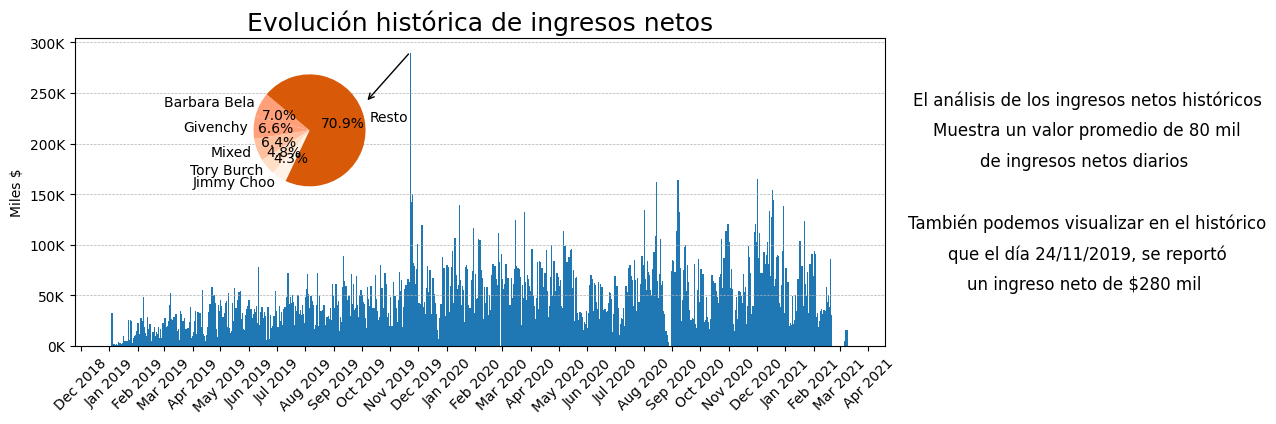

In [ ]:
#Convertimos las fechas a datetime
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])

# Definir la consulta SQL para obtener las marcas más vendidas en el día específico
query_marcas = """
    SELECT marca, SUM(cantidad * precio) AS ventas_totales
    FROM itens_pedidos ip
    INNER JOIN productos p ON ip.producto_id = p.producto_id
    INNER JOIN pedidos ped ON ip.pedido_id = ped.pedido_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    GROUP BY marca
    ORDER BY ventas_totales DESC;
"""

# Crear el engine de SQLite
#engine = create_engine('sqlite:///database.sqlite')

# Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df_marcas = pd.read_sql_query(query_marcas, engine)



# Tomar las primeras 5 marcas y sumar el resto de las ventas
top_5_marcas = df_marcas.head(5)
resto_ventas = df_marcas.iloc[5:]['ventas_totales'].sum()

# Crear un nuevo DataFrame con las primeras 5 marcas y el resto de las ventas
df_plot = pd.concat([top_5_marcas, pd.DataFrame({'marca': ['Resto'], 'ventas_totales': [resto_ventas]})])

# Calcular los porcentajes de las ventas para cada marca
porcentajes = df_plot['ventas_totales'] / df_plot['ventas_totales'].sum() * 100


# Crear un degradado de marrón comenzando con el color #D85A09 y yendo hacia tonos más claros
colors = ['#FFA07b', '#FFA07A', '#FFC09F', '#FFE0C7', '#FFF2E6', '#D85A09']

# Crear la figura y los objetos de ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Dibujar el gráfico de barras
ax.bar(df.fecha_compra, df.total_ventas, width=1.5)
ax.xaxis.set_major_locator(mdates.DayLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Formatear el eje X
plt.xticks(rotation=45)

# Formatear los números en el eje y como "100k"
formatter = FuncFormatter(lambda x, _: f'{x / 1000:.0f}K')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Miles $')

# Agregar título al gráfico
plt.title('Evolución histórica de ingresos netos', fontsize=18)

# Rotar el eje x a 45 grados
plt.xticks(rotation=45)

# Agregar espacio a la derecha del gráfico para el texto "lorem ipsum"
fig.subplots_adjust(right=0.8)  # Ajusta el valor según el espacio deseado

# Agregar el texto "lorem ipsum" centrado horizontal y verticalmente en el espacio a la derecha
ax_text = ax.twinx()
ax_text.axis('off')
ax_text.text(1.25, 0.8, 'El análisis de los ingresos netos históricos', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
ax_text.text(1.25, 0.7, f'Muestra un valor promedio de 80 mil', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
ax_text.text(1.25, 0.6, f'de ingresos netos diarios ', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
ax_text.text(1.25, 0.5, f'', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
ax_text.text(1.25, 0.4, f'También podemos visualizar en el histórico', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
ax_text.text(1.25, 0.3, f'que el día 24/11/2019, se reportó', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
ax_text.text(1.25, 0.2, f'un ingreso neto de $280 mil ', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')
#ax_text.text(1.25, 0.1, f'por la venta de algunas marcas famosas', transform=ax_text.transAxes, va='center', ha='center', fontsize='12')

# Mostrar líneas horizontales en el grid
ax.grid(axis='y', linestyle='--', linewidth=0.5)


# Dibujar el gráfico de pastel superpuesto
pie_ax = ax.inset_axes([0.09, 0.5, 0.4, 0.4])  # Posición y tamaño del gráfico de pastel
pie_ax.pie(porcentajes, labels=df_plot['marca'], autopct='%1.1f%%', startangle=140, colors=colors)
pie_ax.axis('equal')

# Añadir la flecha desde el gráfico de pastel
pie_ax.annotate('', xy=(1, 0.5), xytext=(1.8, 1.4), arrowprops=dict(facecolor='black', arrowstyle='->'))


# Mostrar el gráfico
plt.show()


##**3.3: ¿Cuáles son los ingresos netos por vendedor por año?**

In [ ]:
# Configurar la conexión a la base de datos
database = create_engine('sqlite:///database.sqlite')
query='''
    SELECT ven.nombre_vendedor,

     SUM(CASE WHEN fecha_compra BETWEEN "2019-01-01" AND "2019-12-31" THEN total - costo_envio ELSE 0 END) AS año2019,
    SUM(CASE WHEN fecha_compra BETWEEN "2020-01-01" AND "2020-12-31" THEN total - costo_envio ELSE 0 END) AS año2020,
    SUM(CASE WHEN fecha_compra BETWEEN "2021-01-01" AND "2021-12-31" THEN total - costo_envio ELSE 0 END) AS año2021

     FROM itens_pedidos  ip

    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id
    INNER JOIN vendedores ven ON ven.vendedor_id=ped.vendedor_id

    GROUP BY ven.nombre_vendedor
    LIMIT 5
    '''

pd.read_sql(sql=text(query),con=database.connect())

,nombre_vendedor,año2019,año2020,año2021
0,Ana Duarte,2145901.6,5038689.6,547470.4
1,Daniel Siqueira,2010463.2,5238460.8,419702.4
2,Millena Pereira,2049994.4,3769468.8,398896.0
3,Nadia Oliveira,2291658.4,4032669.6,810020.0
4,Paulo Calanca,3701668.0,3563650.4,455401.6


In [ ]:
# Configurar la conexión a la base de datos
database = create_engine('sqlite:///database.sqlite')
query='''
    SELECT ven.nombre_vendedor,strftime("%Y",ped.fecha_compra) as AÑO,
    SUM(total-costo_envio) AS total_ventas
    FROM itens_pedidos  ip
    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id
    INNER JOIN vendedores ven ON ven.vendedor_id=ped.vendedor_id
    GROUP BY ven.nombre_vendedor
    ORDER BY fecha_compra ASC

    '''
DF3=pd.read_sql(sql=text(query),con=database.connect()).set_index('nombre_vendedor')
print(DF3)

                  AÑO  total_ventas
nombre_vendedor                    
Ana Duarte       2019     7755741.6
Daniel Siqueira  2019     7707138.4
Millena Pereira  2019     6257964.0
Nadia Oliveira   2019     7153908.8
Unknown          2019         624.0
Paulo Calanca    2019     7767767.2


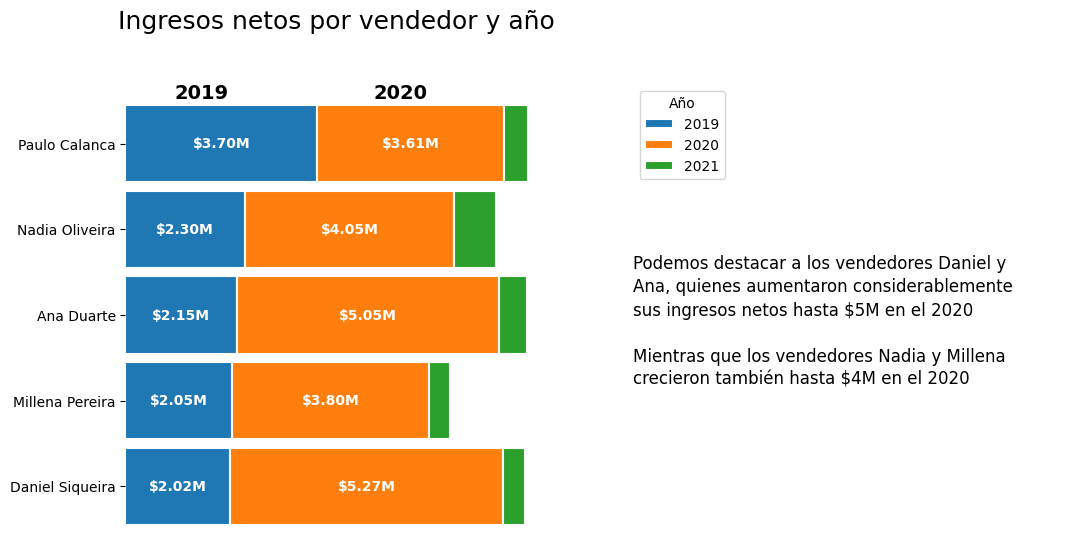

In [ ]:


# Configurar la conexión a la base de datos
database = create_engine('sqlite:///database.sqlite')
query='''
    SELECT ven.nombre_vendedor,
    SUM(CASE WHEN ped.fecha_compra >= "2019-01-01" AND ped.fecha_compra < "2020-01-01" THEN ip.valor_total - ip.costo_envio ELSE 0 END) AS "2019",
    SUM(CASE WHEN ped.fecha_compra >= "2020-01-01" AND ped.fecha_compra < "2021-01-01" THEN ip.valor_total - ip.costo_envio ELSE 0 END) AS "2020",
    SUM(CASE WHEN ped.fecha_compra >= "2021-01-01" AND ped.fecha_compra < "2022-01-01" THEN ip.valor_total - ip.costo_envio ELSE 0 END) AS "2021"
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id
    INNER JOIN vendedores ven ON ven.vendedor_id=ped.vendedor_id
    GROUP BY ven.nombre_vendedor
    ORDER BY "2019" DESC
    LIMIT 5
'''

DF3=pd.read_sql(sql=text(query),con=database.connect()).set_index('nombre_vendedor')

def plot_stacked_barh(data, category_names):
    labels = data.index
    data = data.values

    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(12, 6))
    ax1.invert_yaxis()
    ax1.xaxis.set_visible(False)
    # Eliminar el cuadro delimitador alrededor del gráfico
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

   # Quitar títulos y etiquetas del eje x
    ax1.set_title('')
    ax1.set_xlabel('')
    ax1.set_xticks([])

    ax1.set_title('Ingresos netos por vendedor y año', fontsize=18, pad=40)
    ax1.set_xlabel('Total ventas')
    ax1.set_ylabel('')
    ax1.legend(title='Año')
    ax1.get_legend().remove()  # Remover leyenda


    for i, colname in enumerate(category_names):
        widths = data[:, i]
        starts = np.cumsum(data[:, :i], axis=1)[:, -1] if i > 0 else 0
        bars = ax1.barh(labels, widths, left=starts, height=0.9, edgecolor='white', linewidth=1.5,
                 label=colname)


        for bar, c in zip(bars, data[:, i]):
            if colname != "2021":  # Omitir el texto para el año 2021
                ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                         f'${c / 1000000:.2f}M', ha='center', va='center', color='white', fontweight='bold')

    ax1.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    # Espacio para comentarios
    ax2.text(0, 0.6, 'Podemos destacar a los vendedores Daniel y', fontsize=12, ha='left')
    ax2.text(0, 0.55, 'Ana, quienes aumentaron considerablemente', fontsize=12, ha='left')
    ax2.text(0, 0.5,  'sus ingresos netos hasta $5M en el 2020', fontsize=12, ha='left')
    ax2.text(0, 0.45,  '', fontsize=12, ha='left')
    ax2.text(0, 0.40, 'Mientras que los vendedores Nadia y Millena', fontsize=12, ha='left')
    ax2.text(0, 0.35, 'crecieron también hasta $4M en el 2020', fontsize=12, ha='left')
    ax2.axis('off')  # Ocultar ejes


    # Crear leyenda para el segundo subplot
    handles, labels = ax1.get_legend_handles_labels()
    ax2.legend(handles, labels, loc='upper left', title='Año')
    ax1.get_legend().remove()  # Remover leyenda

    # Agregar texto "2019" y "2020" en negrita encima del gráfico
    ax1.text(0.18, 0.98, '2019', ha='center', va='center', fontsize=14, fontweight='bold', transform=ax1.transAxes)
    ax1.text(0.65, 0.98, '2020', ha='center', va='center', fontsize=14, fontweight='bold', transform=ax1.transAxes)


    return fig, (ax1, ax2)

plot_stacked_barh(DF3, ["2019", "2020", "2021"])
plt.show()





##**3.4: ¿Cuáles son las ciudades que proporcionan mayores ingresos netos?**

In [ ]:
#utilizamos la liberia de geobr para crear un data frame sobre las regiones de brazil
dfbra=geobr.read_state()

In [ ]:
# Definir el nombre del archivo de la base de datos SQLite
database = 'database.sqlite'
# Crear una conexión con la base de datos
conn = sqlite3.connect(database)
query='''
    SELECT ip.ciudad,
    SUM(total-costo_envio) AS ingresos_netos,
    SUBSTRING(ciudad,4,4) AS abbrev_state


    FROM itens_pedidos  ip

    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id


    GROUP BY ciudad
    '''

df4=pd.read_sql_query(query, conn)

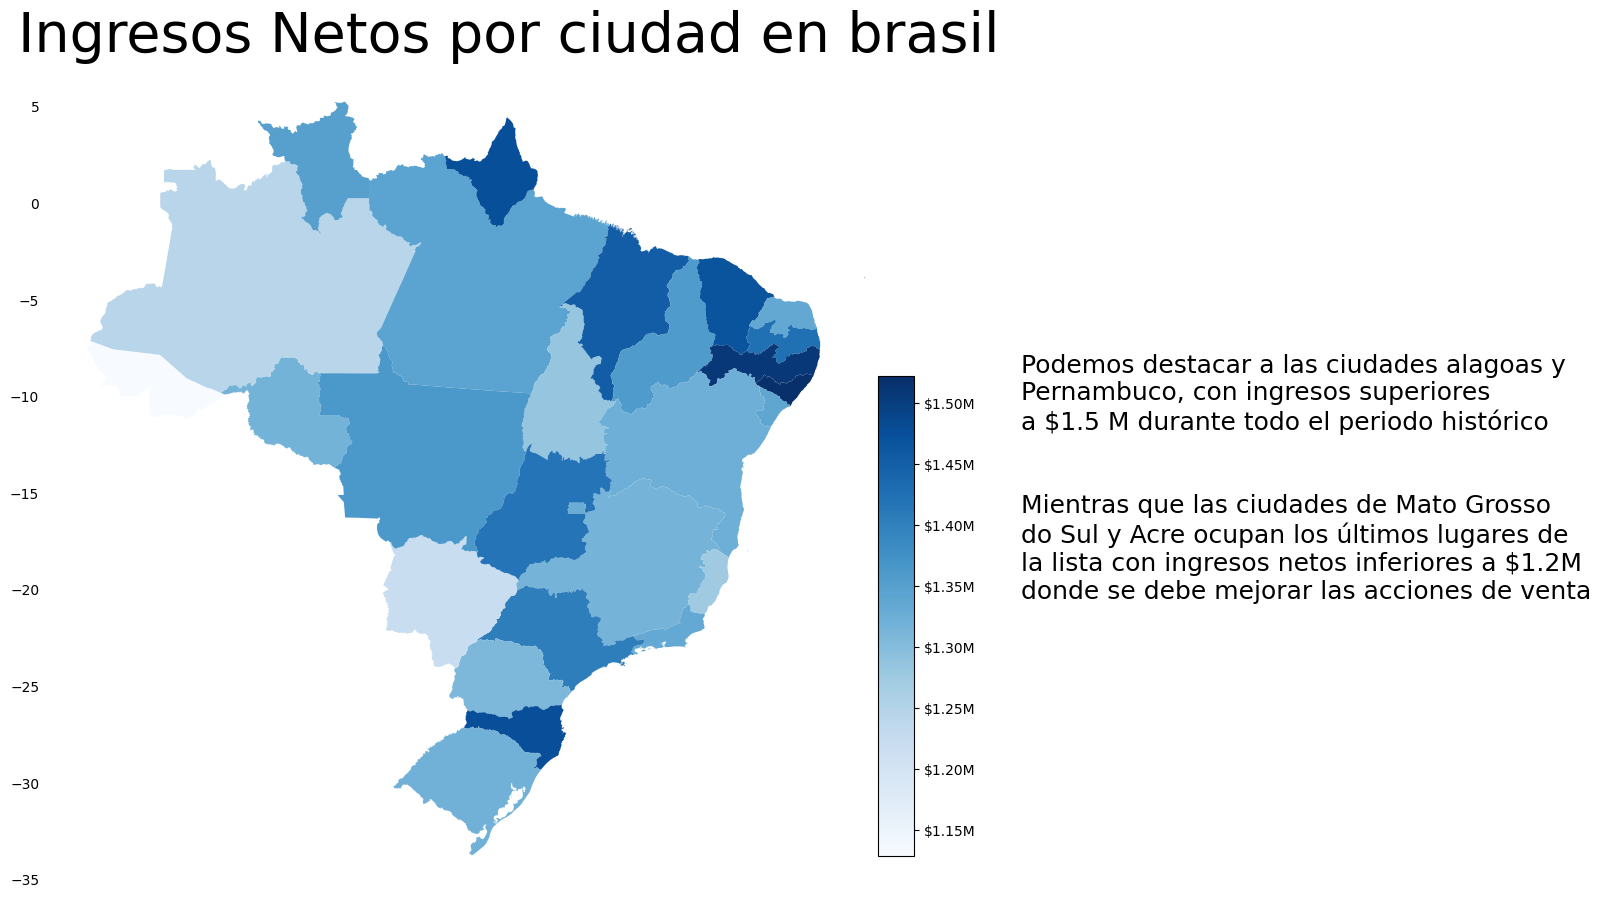

In [ ]:


br_uf_d=dfbra.merge(df4,on=["abbrev_state"],how='outer')
br_uf_d=br_uf_d[["geometry","ingresos_netos"]]


# Crear la figura y los objetos de ejes
fig, ax = plt.subplots(figsize=(12, 12))

ax=br_uf_d.plot(ax=ax,column="ingresos_netos",cmap="Blues")

cax = fig.add_axes(
    [
        0.82,    # posicao x (entre 0.0 e 1.0)
        0.18,    # posicao y (entre 0.0 e 1.0)
        0.03,    # largura x
        0.40,    # altura y
    ]
)

sm = plt.cm.ScalarMappable(
    cmap="Blues",                                       # Usa o mesmo cmap do mapa
    norm=plt.Normalize(
        vmin=br_uf_d["ingresos_netos"].min(),  # Valor mínimo
        vmax=br_uf_d["ingresos_netos"].max(),  # Valor máximo
    ),
)
fig.colorbar( sm,
    cax=cax,
    # Formata a escala do Colorbar
    format=ticker.FuncFormatter(lambda x, _: f'${x / 1000000:.2f}M'),)

# Quitar la cuadrícula del fondo
ax.grid(False)

# Quitar el cuadro delimitador
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# Eliminar etiquetas y ticks del eje y
ax.set_xticklabels([])
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

# Eliminar el título del eje x
ax.set_xlabel('')

# Eliminar el título del eje y
ax.set_ylabel('')

# Agregar espacio a la derecha del gráfico para el texto "lorem ipsum"
fig.subplots_adjust(right=0.9)  # Ajusta el valor según el espacio deseado


#AGREGA EL TITULO
ax.set_title(
    "Ingresos Netos por ciudad en brasil",
    fontdict={"fontsize": 40},
)

# Obtener límites del eje x y eje y
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Añadir texto adicional debajo de la línea
ax.text(x_limits[1] + (x_limits[1] - x_limits[0]) * 0.05,
         (y_limits[0] + y_limits[1]) / 2,
         'Podemos destacar a las ciudades alagoas y \n'
         f'Pernambuco, con ingresos superiores \n'
         f'a $1.5 M durante todo el periodo histórico\n'
         '\n'
         '\n'
         'Mientras que las ciudades de Mato Grosso \n'
         f'do Sul y Acre ocupan los últimos lugares de \n'
         f'la lista con ingresos netos inferiores a $1.2M \n'
         f'donde se debe mejorar las acciones de venta',
         fontsize=18,
         ha='left',  # Alinear a la izquierda horizontalmente
         va='center')  # Centrar verticalmente




plt.show()


##**3.5: ¿Cuál es la causa del repunte del día 24/11/2019?**

In [ ]:

# Definir el nombre del archivo de la base de datos SQLite
database = 'database.sqlite'
# Crear una conexión con la base de datos
conn = sqlite3.connect(database)
query = '''
    SELECT strftime('%Y-%m-%d',ped.fecha_compra) AS fecha_compra,
           SUM(total-costo_envio) AS total_ventas
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id
    GROUP BY ped.fecha_compra
    ORDER BY fecha_compra ASC
'''

# Ejecutar la consulta y guardar el resultado en un dataframe
df = pd.read_sql_query(query, conn)
df

,fecha_compra,total_ventas
0,2019-01-05,32460.8
1,2019-01-06,1728.0
2,2019-01-07,1560.0
3,2019-01-08,1024.0
4,2019-01-09,400.0
...,...,...
775,2021-02-21,30944.8
776,2021-03-07,4744.0
777,2021-03-08,16206.4
778,2021-03-09,4128.0


In [ ]:

# Definir el nombre del archivo de la base de datos SQLite
database = 'database.sqlite'
# Crear una conexión con la base de datos
conn = sqlite3.connect(database)
query_df_total_cantidad = '''
    SELECT strftime('%Y-%m-%d', ped.fecha_compra) AS fecha_compra,
           SUM(total - costo_envio) AS total_ventas,
           SUM(ip.cantidad) AS total_cantidad
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id = ip.pedido_id
    GROUP BY ped.fecha_compra
    ORDER BY fecha_compra ASC
'''

# Ejecutar la consulta y guardar el resultado en un dataframe
df_total_cantidad = pd.read_sql_query(query_df_total_cantidad, conn)
df_total_cantidad

query_df_total_cantidad_dia_x = '''
    SELECT strftime('%Y-%m-%d', ped.fecha_compra) AS fecha_compra,
           SUM(total - costo_envio) AS total_ventas,
           SUM(ip.cantidad) AS total_cantidad
    FROM itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id = ip.pedido_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    GROUP BY ped.fecha_compra
    ORDER BY fecha_compra ASC
'''
# Ejecutar la consulta y guardar el resultado en un dataframe
df_total_cantidad_dia_x = pd.read_sql_query(query_df_total_cantidad_dia_x, conn)
df_total_cantidad_dia_x





,fecha_compra,total_ventas,total_cantidad
0,2019-11-24,289960.8,710


La media de ventas por vendedor es: 57992.159999999996


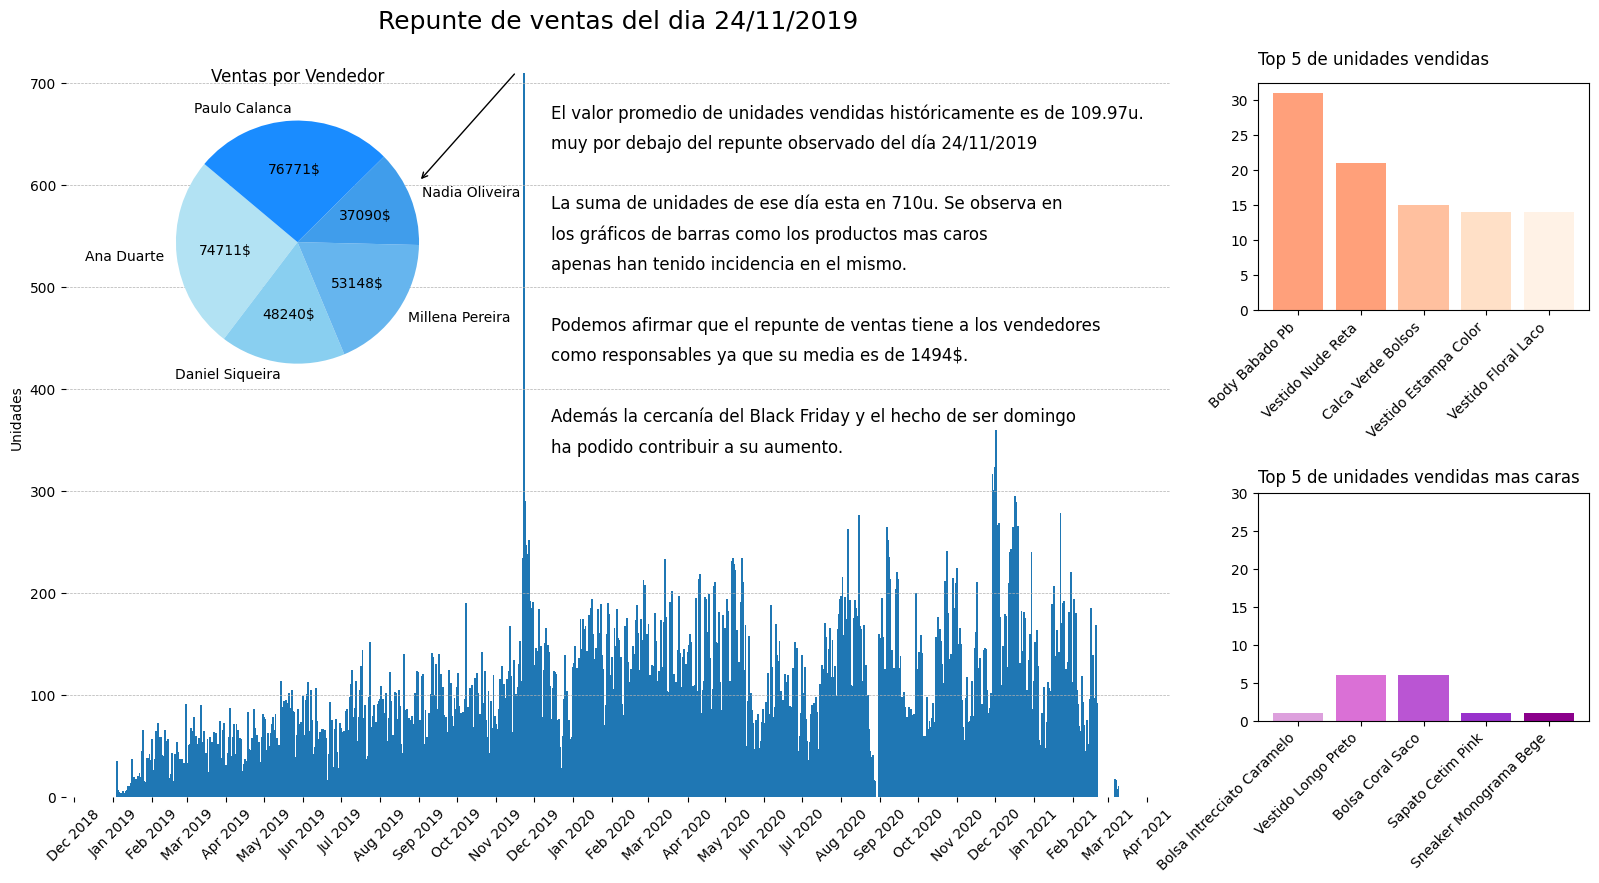

In [ ]:
#Convertimos las fechas a datetime
df_total_cantidad['fecha_compra'] = pd.to_datetime(df['fecha_compra'])

# Definir la consulta SQL para obtener las marcas más vendidas en el día específico
query_productos_5 = """
SELECT t.producto_id,
       t.producto,
       t.precio,
       SUM(t.cantidad) AS cantidad_total,
       SUM(t.cantidad * t.precio) AS total_por_precio
FROM (
    SELECT p.producto_id,
           p.producto,
           p.precio,
           ip.cantidad
    FROM itens_pedidos ip
    INNER JOIN productos p ON ip.producto_id = p.producto_id
    INNER JOIN pedidos ped ON ip.pedido_id = ped.pedido_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    AND p.precio = (
        SELECT MAX(precio)
        FROM productos
        WHERE producto = p.producto
    )
) AS t
GROUP BY t.producto_id, t.producto, t.precio
ORDER BY cantidad_total DESC
LIMIT 5;
"""

query_productos_5_caros = """
SELECT t.producto_id,
       t.producto,
       t.precio,
       SUM(t.cantidad) AS cantidad_total,
       SUM(t.cantidad * t.precio) AS total_por_precio
FROM (
    SELECT p.producto_id,
           p.producto,
           p.precio,
           ip.cantidad
    FROM itens_pedidos ip
    INNER JOIN productos p ON ip.producto_id = p.producto_id
    INNER JOIN pedidos ped ON ip.pedido_id = ped.pedido_id
    WHERE strftime('%Y-%m-%d', ped.fecha_compra) = '2019-11-24'
    AND p.precio = (
        SELECT MAX(precio)
        FROM productos
        WHERE producto = p.producto
    )
) AS t
GROUP BY t.producto_id, t.producto, t.precio
ORDER BY precio DESC
LIMIT 5;
"""

query_vendedores="""
SELECT
    ven.nombre_vendedor,
    SUM(CASE WHEN DATE(ped.fecha_compra) = '2019-11-24' THEN ip.valor_total - ip.costo_envio ELSE 0 END) AS Total_neto
FROM
    itens_pedidos ip
    INNER JOIN pedidos ped ON ped.pedido_id = ip.pedido_id
    INNER JOIN vendedores ven ON ven.vendedor_id = ped.vendedor_id
GROUP BY
    ven.nombre_vendedor
LIMIT 5;
"""



# Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df_productos_5 = pd.read_sql_query(query_productos_5, engine)
# Tomar los primeros 5 productos y sumar el resto de las ventas
top_5_productos = df_productos_5.head(5)
# Crear un degradado de marrón comenzando con el color #D85A09 y yendo hacia tonos más claros
colors = ['#FFA07b', '#FFA07A', '#FFC09F', '#FFE0C7', '#FFF2E6', '#D85A09']

# Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df_productos_5_caros = pd.read_sql_query(query_productos_5_caros, engine)
# Tomar los primeros 5 productos y sumar el resto de las ventas
top_5_productos_caros = df_productos_5_caros.head(5)
colores_caros = ['#DDA0DD', '#DA70D6', '#BA55D3', '#9932CC', '#8B008B', '#9400D3']

# Ejecutar la consulta SQL y guardar el resultado en un DataFrame
df_vendedores = pd.read_sql_query(query_vendedores, engine)
# Tomar los primeros 5 productos y sumar el resto de las ventas
df_vendedores = df_vendedores.head(5)
colores_vendedores = ['#B2E2F3', '#89CFF0', '#66B5EE', '#409DEB', '#1A8CFF', '#B0DFE5']

# Hallar la media de unidades vendidas
media_unidades = round(df_total_cantidad.total_cantidad.mean(), 2)
# Hallar la suma de unidades vendidas
suma_unidades = round(df_total_cantidad_dia_x.total_cantidad.sum(), 2)

# Calcular la media de ventas por vendedor
media_ventas_por_vendedor = df_vendedores['Total_neto'].mean()
# Imprimir la media de ventas por vendedor
print(f"La media de ventas por vendedor es: {media_ventas_por_vendedor}")


# Crear la figura y los objetos de ejes
fig, ax = plt.subplots(figsize=(16, 9))
# Dibujar el gráfico de barras
ax.bar(df_total_cantidad.fecha_compra, df_total_cantidad.total_cantidad, width=1.5)
ax.xaxis.set_major_locator(mdates.DayLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Formatear el eje X
plt.xticks(rotation=45)
#quitar cuadro delimitador
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_ylabel('Unidades')
# Agregar título al gráfico
plt.title('Repunte de ventas del dia 24/11/2019', fontsize=18)
# Rotar el eje x a 45 grados
plt.xticks(rotation=45)

# Agregar espacio a la derecha del gráfico para el texto
fig.subplots_adjust(right=0.8)  # Ajusta el valor según el espacio deseado
ax_text = ax.twinx()
ax_text.axis('off')
ax_text.text(1.08, 0.97, 'Top 5 de unidades vendidas', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(1.08, 0.42, f'Top 5 de unidades vendidas mas caras', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.90, f'El valor promedio de unidades vendidas históricamente es de {media_unidades}u. ', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.86, f'muy por debajo del repunte observado del día 24/11/2019', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.82, f'', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.78, f'La suma de unidades de ese día esta en {suma_unidades}u. Se observa en ', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.74, f'los gráficos de barras como los productos mas caros', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.70, f'apenas han tenido incidencia en el mismo.', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.66, f'', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.62, f'Podemos afirmar que el repunte de ventas tiene a los vendedores', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.58, f'como responsables ya que su media es de 1494$.', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.54, f'', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.50, f'Además la cercanía del Black Friday y el hecho de ser domingo', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')
ax_text.text(0.44, 0.46, f'ha podido contribuir a su aumento.', transform=ax_text.transAxes, va='center', ha='left', fontsize='12')

## Mostrar líneas horizontales en el grid
ax.grid(axis='y', linestyle='--', linewidth=0.5)


# Crear un nuevo eje para el gráfico de barras
bar_ax = ax.inset_axes([1.08, 0.64, 0.3, 0.3])  # Posición y tamaño del gráfico de barras
# Dibujar el gráfico de barras verticales
bar_ax.bar(range(len(top_5_productos['producto'])), top_5_productos['cantidad_total'], color=colors)
# Asignar los nombres de los productos como etiquetas del eje x
bar_ax.set_xticks(range(len(top_5_productos['producto'])))
bar_ax.set_xticklabels(top_5_productos['producto'], rotation=45, ha='right')

# Crear un nuevo eje para el gráfico de barras
bar_ax = ax.inset_axes([1.08, 0.10, 0.3, 0.3])  # Posición y tamaño del gráfico de barras
# Dibujar el gráfico de barras verticales
bar_ax.bar(range(len(df_productos_5_caros['producto'])), df_productos_5_caros['cantidad_total'], color=colores_caros)
# Asignar los nombres de los productos como etiquetas del eje x
bar_ax.set_xticks(range(len(df_productos_5_caros['producto'])))
bar_ax.set_xticklabels(df_productos_5_caros['producto'], rotation=45, ha='right')
#bar_ax.set_ylabel('Top productos mas caros')

# Ajustar el límite del eje y para que llegue hasta 30
bar_ax.set_ylim(0, 30)

# Crear un gráfico de pastel con los totales de ventas por vendedor
pie_ax = ax.inset_axes([0.01, 0.53, 0.4, 0.4])  # Posición y tamaño del gráfico de pastel
pie_ax.pie(df_vendedores['Total_neto'], labels=df_vendedores['nombre_vendedor'], autopct=lambda p: f'{p * sum(df_vendedores["Total_neto"]) / 100:.0f}$', startangle=140, colors=colores_vendedores)
pie_ax.set_title('Ventas por Vendedor')

# Añadir la flecha desde el gráfico de pastel
pie_ax.annotate('', xy=(1, 0.5), xytext=(1.8, 1.4), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()

# Mostrar el gráfico
plt.show()



##**3.6: ¿Cuáles son las regiones que generaron menores ingresos netos?**

In [ ]:
query='''
    SELECT ip.ciudad,
    SUM(total-costo_envio) AS ingresos_netos,
    SUBSTRING(ciudad,4,4) AS abbrev_state,
    SUM(cantidad) AS cantidad_vendida

    FROM itens_pedidos  ip

    INNER JOIN pedidos ped ON ped.pedido_id=ip.pedido_id


    GROUP BY ciudad
    ORDER BY ingresos_netos DESC

    '''

df_extra=pd.read_sql_query(query, conn)


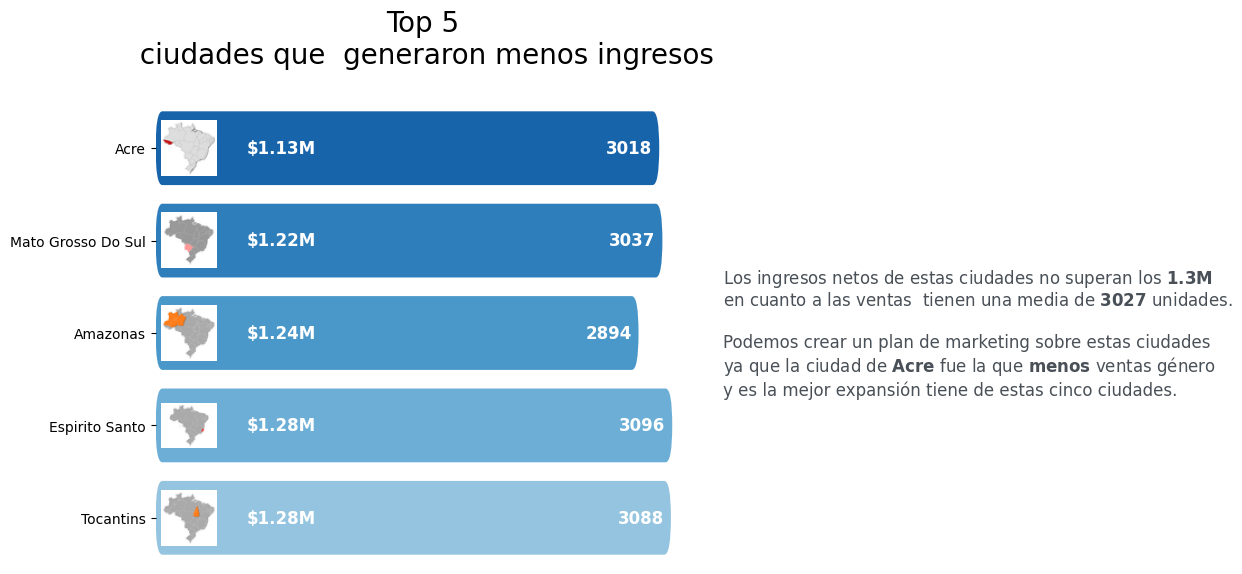

In [ ]:
cd_bra_ven=dfbra.merge(df_extra,on=["abbrev_state"],how='outer')[["ingresos_netos","cantidad_vendida","name_state","name_region"]]
cd_bra_ven=cd_bra_ven.sort_values(by="ingresos_netos").head(5)

cd_bra_ven["ingresos_netos"]=(cd_bra_ven["ingresos_netos"]/1000000).apply(lambda x:f'${x:.2f}M')
#generan las figuras
imagenes_paths=[ 'https://i.postimg.cc/fLQt8CrM/acre.png',
                'https://i.postimg.cc/gjHRbS0H/mato.png',
                'https://i.postimg.cc/J7x2b2sc/amazonas1.png',
                'https://i.postimg.cc/15h8wC13/espirito.png',
                'https://i.postimg.cc/9fSj7QNw/tocatins.png']



plt.subplots(figsize=(7,6))
colores_azules=plt.cm.Blues_r(np.linspace(0.2,0.6,len(cd_bra_ven)))
ax=sns.barplot(x=cd_bra_ven.cantidad_vendida/20,y=cd_bra_ven.name_state,orient='h',joinstyle='bevel')
new_patches=[]


for patch,color,name_state,cantidad_vendida,ingresos_netos,image_path in zip(ax.patches,colores_azules,cd_bra_ven["name_state"],cd_bra_ven["cantidad_vendida"],cd_bra_ven["ingresos_netos"],imagenes_paths):
    bb = patch.get_bbox()

    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0040,rounding_size=2",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

    #añadir imagen a la barra
    response=requests.get(image_path)
    image=plt.imread(BytesIO(response.content))
    imagebox=OffsetImage(image,zoom=0.8)
    ab=AnnotationBbox(imagebox,xy=(10,patch.get_y()+patch.get_height()/2),
                    xybox=(0,0),xycoords="data",boxcoords="offset points",
                    pad=0,arrowprops=dict(arrowstyle='-',color='none'),
                    bboxprops=dict(facecolor='none',edgecolor='none'))

    ax.add_artist(ab)

    #añadir TEXTO cantidad vendida A LADO DE LA derecho DE LA BARRA
    ax.annotate(f'{cantidad_vendida}',xy=(patch.get_width(),patch.get_y()+patch.get_height()/2),
                xytext=(-5,0),textcoords='offset points',
                color='white',fontweight='bold',fontsize=12,ha='right',va='center',
                xycoords='data',
                bbox=dict(facecolor='none',edgecolor='none',pad=0),
                annotation_clip=False)

    #añadir texto total_vendido a lado izquierdo de la barra

    ax.annotate(f'{ingresos_netos}',xy=(50,patch.get_y()+patch.get_height()/2),
                xytext=(-5,0),textcoords='offset points',
                arrowprops=dict(arrowstyle='-',color='none'),
                color='white',fontweight='bold',fontsize=12,ha='right',va='center',
                xycoords='data',
                bbox=dict(facecolor='none',edgecolor='none',pad=0),
                annotation_clip=False)

for patch in new_patches:
    ax.add_patch(patch)


#agregar concluiusioon a la derecga del grafico

conclusion_text=(
    "Los ingresos netos de estas ciudades no superan los $\\bf{1.3M}$ \n"
    "en cuanto a las ventas  tienen una media de $\\bf{3027}$ unidades.\n\n"
    "Podemos crear un plan de marketing sobre estas ciudades\n"
    "ya que la ciudad de $\\bf{Acre}$ fue la que $\\bf{menos}$ ventas género\n"
    "y es la mejor expansión tiene de estas cinco ciudades."

)

ax.text(170,2,conclusion_text,fontsize=12,color='#495057',va='center',ha='left')

#Personalizando el grafico
ax.set_title("Top 5 \n ciudades que  generaron menos ingresos \n ", loc="center",fontdict={"fontsize":20},pad=0,color = "black")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
sns.despine(left=True, bottom=True)


plt.show()


##**3.7: Según la condición de la ropa, ¿Cuál es el que más ventas tuvo históricamente?**


In [ ]:
crear_conexion()
query='''
    SELECT ip.producto_id,
    SUM(valor_total) AS total_vendido,
    SUM(cantidad) AS cantidad_vendida,
    condicion as condicion_ropa
    FROM itens_pedidos ip
    INNER JOIN productos p ON p.producto_id=ip.producto_id
    GROUP BY p.condicion
    '''
df=pd.read_sql_query(query, conn)


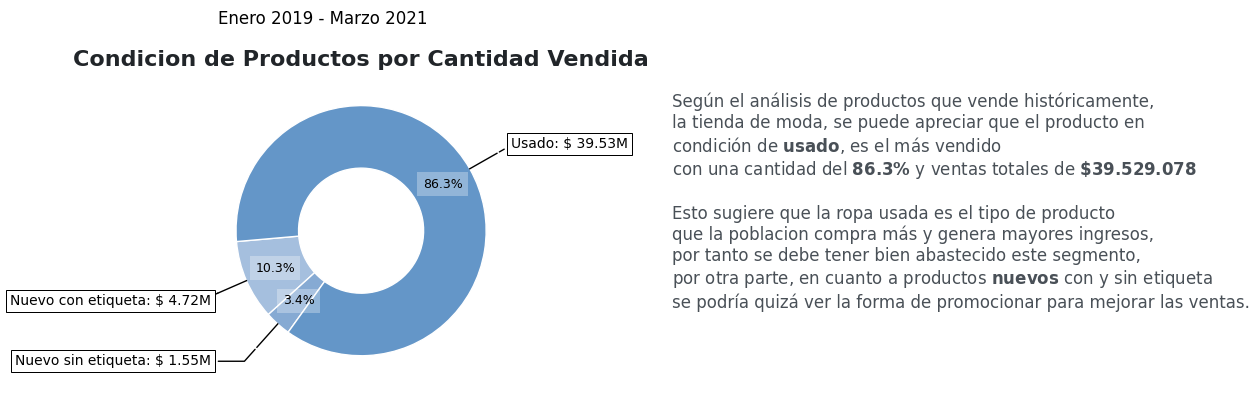

In [ ]:
# Se aplica el formato de cantidad en millones
df['total_vendidos'] = (df['total_vendido'] / 1_000_000).apply(lambda x: f'${x: .2f}M')

# Configuración básica de los gráficos
fig, axs = plt.subplots(figsize=(7, 4))
colores = ['#a5bfde', '#86aad3', '#6496c8']

# Gráfico de dona
wedges_con, texts_con, autotexts_con = axs.pie(df['total_vendido'], colors=colores, autopct='%1.1f%%',
                                                       textprops={'fontsize': 9, 'bbox': dict(facecolor="white", edgecolor="black", linewidth=0, alpha=0.3)}, pctdistance=0.75,
                                                       startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

bbox_condicion = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
lines = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_condicion, zorder=0, va="center")

for i, p in enumerate(wedges_con):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    # Coordenadas para trazar la línea de conexión
    x_line = 1.25 * np.cos(np.deg2rad(ang))
    y_line = 1.25 * np.sin(np.deg2rad(ang))
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    lines["arrowprops"].update({"connectionstyle": connectionstyle})

    # Anotar el texto
    axs.plot([x, x_line], [y, y_line], color='black', linestyle='-', linewidth=1)
    axs.annotate(df['condicion_ropa'][i] + ': ' + str(df['total_vendidos'][i]), xy=(x_line, y_line),
                    xytext=(1.2 * np.sign(x), 1.4 * y),
                    horizontalalignment=horizontalalignment, **lines, fontsize=10)

plt.title('Condicion de Productos por Cantidad Vendida', fontsize = 16, fontweight='bold', color='#212529')
plt.suptitle('Enero 2019 - Marzo 2021')
#axs.set_title('Enero 2019 - Marzo 2021', fontsize = 12, fontweight='bold', color='#212529')
# Agregar conclusion a la derecha del gráfico
conclusion_text = ("Según el análisis de productos que vende históricamente,\n"
  "la tienda de moda, se puede apreciar que el producto en\n"
  "condición de $\\bf{usado}$, es el más vendido\n"
  "con una cantidad del $\\bf{86.3 \%}$ y ventas totales de $\\bf{\$ 39.529.078}$\n\n"
  "Esto sugiere que la ropa usada es el tipo de producto\n"
  "que la poblacion compra más y genera mayores ingresos, \n"
  "por tanto se debe tener bien abastecido este segmento, \n"
  "por otra parte, en cuanto a productos $\\bf{nuevos}$ con y sin etiqueta\n"
  "se podría quizá ver la forma de promocionar para mejorar las ventas.")
fig.text(1, 0.5, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')

plt.tight_layout()
plt.show()

#Conclusión

El análisis de los datos revela importantes insights sobre el negocio que pueden guiar estratégicamente las decisiones de la tienda online de moda.
Se identificó el Top 5 de productos más vendidos históricamente, lo cual permite enfocar esfuerzos en estos artículos clave. También se analizó la evolución de los ingresos netos y los patrones por vendedor y ciudad/región.
Para impulsar el rendimiento, se recomienda profundizar en el análisis de la condición de los productos, investigar a fondo el repunte del 24/11/2019 y aprovechar las oportunidades en las ciudades y regiones más rentables.